In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("archive/Clean_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df = df.drop('Unnamed: 0', axis=1) 

In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
# Print the type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
# Data Processing

In [8]:
# count the values of each airline
df1 = df.groupby(['flight','airline'], as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

In [9]:
for column in df.columns:
    if column != 'duration' and column != 'price' and column != 'days_lefts' and column != 'flight':
        print(f"{column}: \n{df[column].unique()}\n\n")
# print type of values in each columns

airline: 
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


source_city: 
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']


departure_time: 
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


stops: 
['zero' 'one' 'two_or_more']


arrival_time: 
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


destination_city: 
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


class: 
['Economy' 'Business']


days_left: 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]




In [10]:
# Data analyis

In [11]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", rc=custom_params)

In [12]:
# Is there a price difference between airlines?

Text(0.5, 1.0, 'PRICE DIFFERENCE BETWEEN AIRLINES')

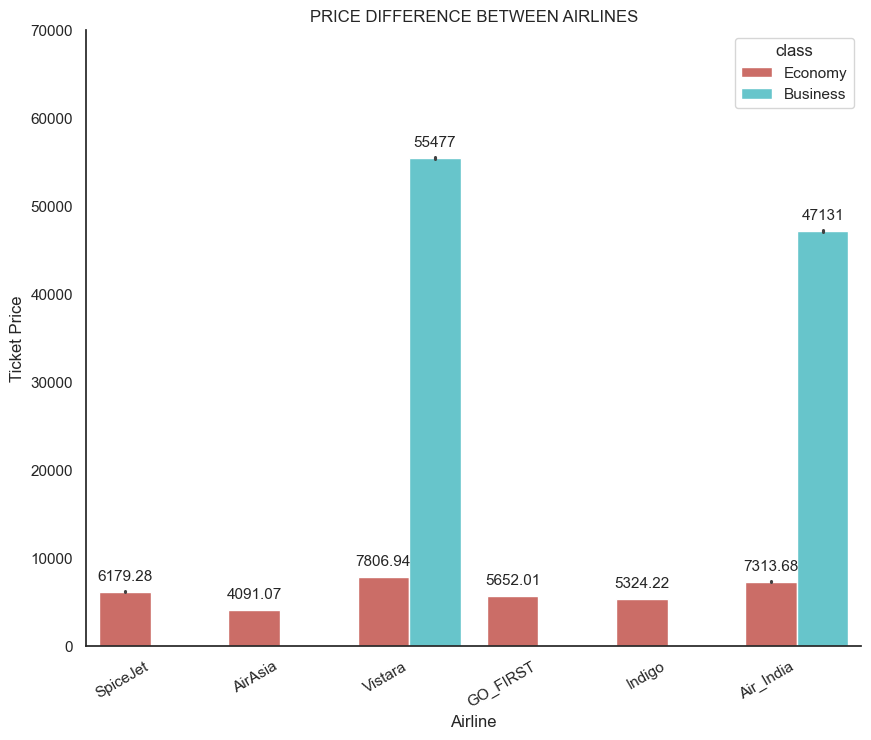

In [13]:
# Plot chart comparing ticket prices between airlines
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=df, x='airline', y='price', hue='class', palette='hls')
for i in ax.containers:
    ax.bar_label(i, padding=6, 
                 label_type='edge', 
                 fontsize=11)
plt.ylabel('Ticket Price', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Airline', fontsize=12)
plt.ylim(0, 70000)
plt.title('PRICE DIFFERENCE BETWEEN AIRLINES', fontsize=12)

In [14]:
# Number of flights per airline

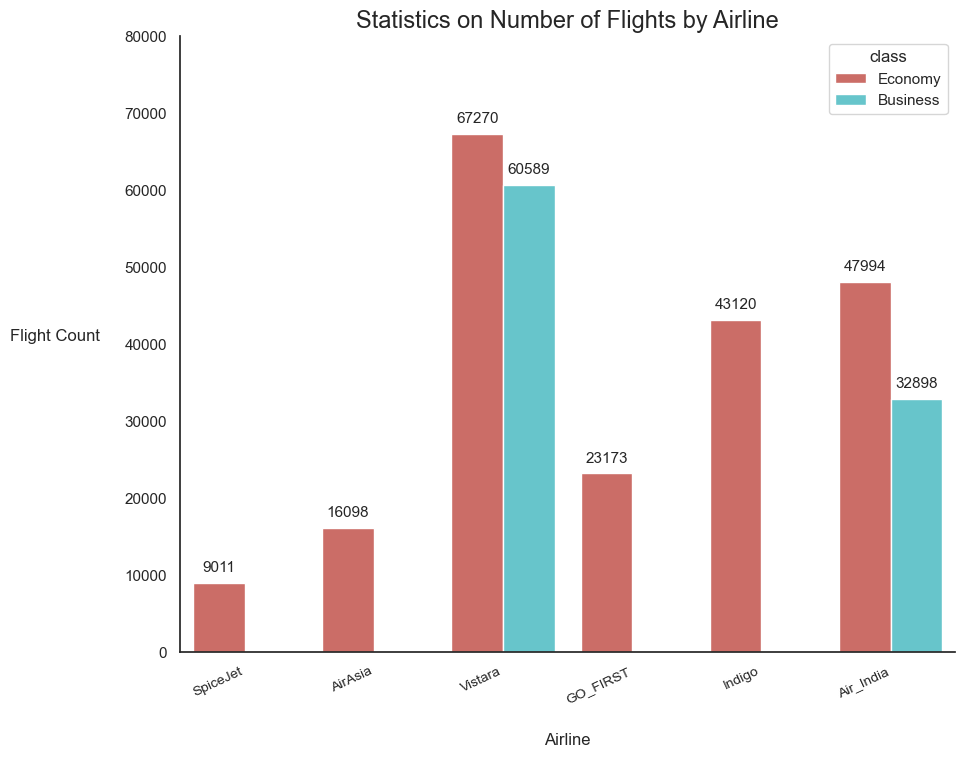

In [15]:
# Statistical count of flights by airline
plt.figure(figsize=(10, 8))
ax = sns.countplot(x=df['airline'], palette='hls', hue=df["class"])
plt.title('Statistics on Number of Flights by Airline', fontsize=17)
for i in ax.containers:
    ax.bar_label(i, padding=6, 
                 label_type='edge', 
                 fontsize=11)
plt.ylim(0, 80000)
plt.xlabel('Airline', fontsize=12, labelpad=20)
plt.ylabel('Flight Count', fontsize=12, rotation=0, labelpad=50, loc='center')
plt.xticks(rotation=25, 
           horizontalalignment='right', 
           fontweight='light', 
           fontsize=10)
plt.show()

In [16]:
# The price of tickets depends on the number of days before the flight.

<Axes: xlabel='days_left', ylabel='price'>

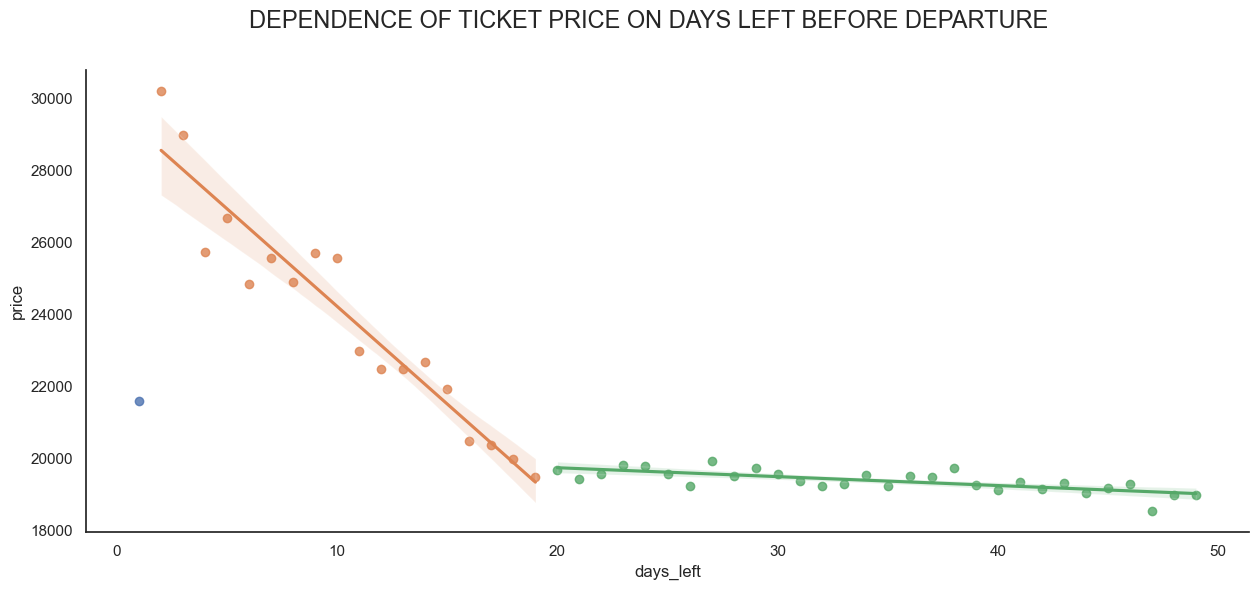

In [17]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15, 6)).suptitle('DEPENDENCE OF TICKET PRICE ON DAYS LEFT BEFORE DEPARTURE', fontsize=17)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

In [18]:
# Do ticket prices change depending on departure and arrival times?

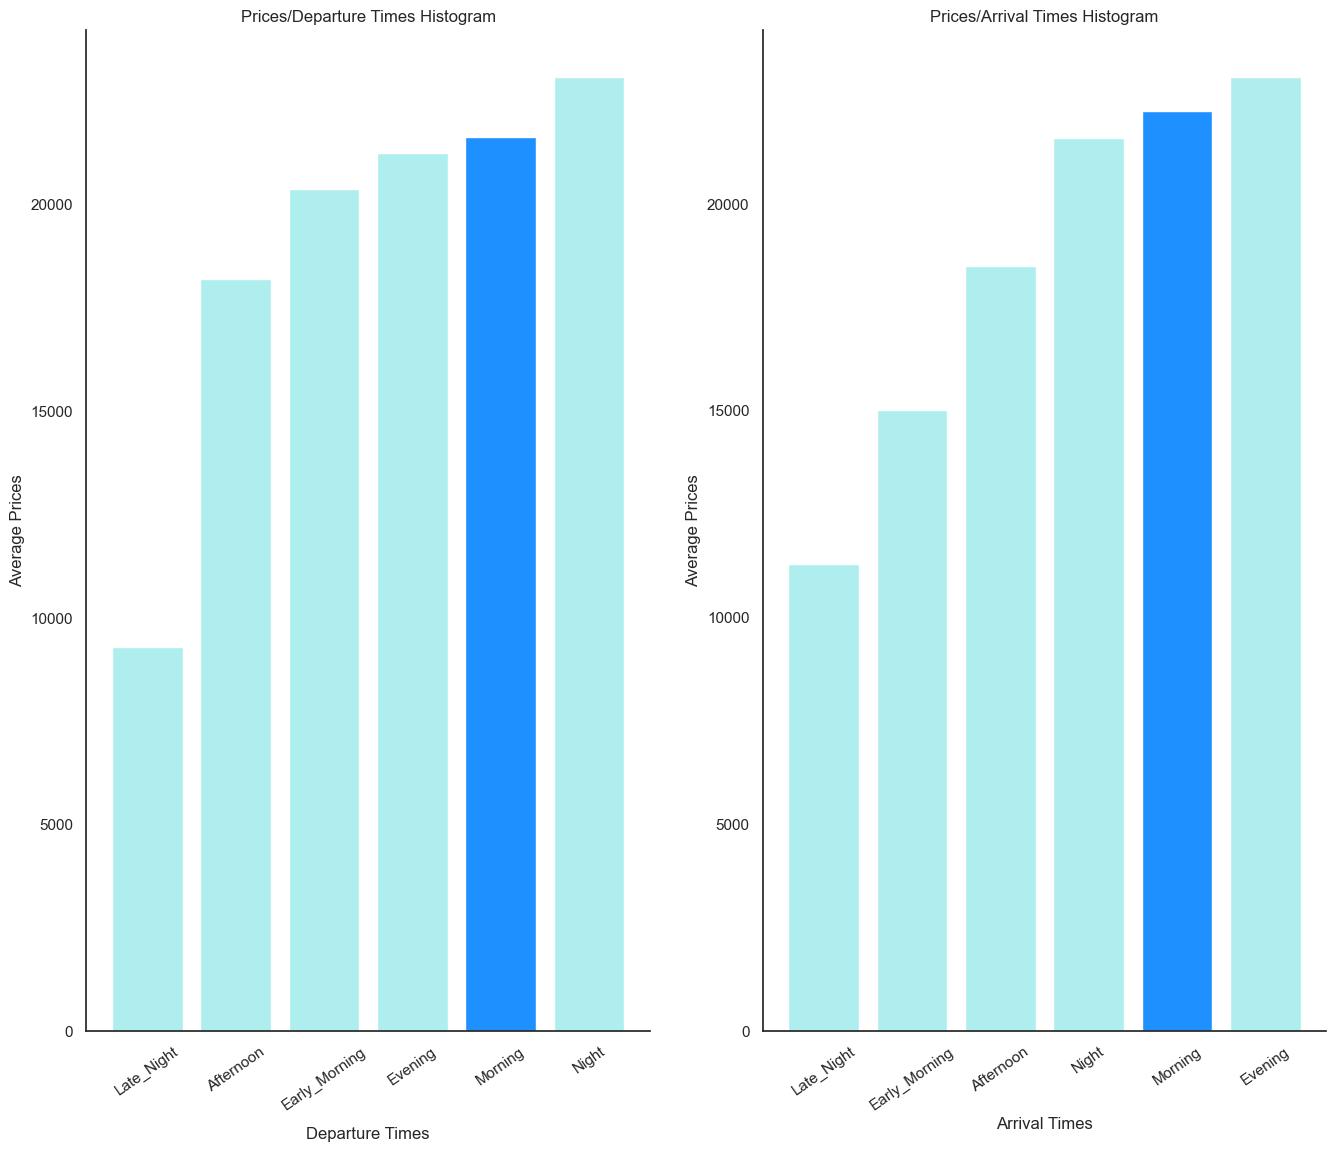

In [19]:
departure_time_price = df.groupby('departure_time')['price'].mean().round(0).sort_values(ascending=True)
arrival_time_price = df.groupby('arrival_time')['price'].mean().round(0).sort_values(ascending=True)

plt.figure(figsize=(16, 13))

plt.subplot(1, 2, 1)
plt.bar(departure_time_price.index, departure_time_price.values, color=['paleturquoise', 'paleturquoise', 'paleturquoise', 'paleturquoise', 'dodgerblue'])
plt.title("Prices/Departure Times Histogram")
plt.xlabel("Departure Times", labelpad=10)
plt.ylabel("Average Prices")
plt.xticks(rotation=35)

plt.subplot(1, 2, 2)
plt.bar(arrival_time_price.index, arrival_time_price.values, color=['paleturquoise', 'paleturquoise', 'paleturquoise', 'paleturquoise', 'dodgerblue'])
plt.title("Prices/Arrival Times Histogram")
plt.xlabel("Arrival Times", labelpad=3)
plt.ylabel("Average Prices")
plt.xticks(rotation=35)

plt.show()

In [20]:
# How does the price change with variations between different departure and arrival points?

In [21]:
# removing outliers and unnecessary columns
df1 = df.drop(["flight", "departure_time", "arrival_time", "stops"], axis=1)
df2 = df1.copy()

# feature engineering: combining destination and source into one column
df2["source_and_destination"] = df2[["source_city", "destination_city"]].apply(lambda x: "-".join(x), axis=1)
df2.drop(["source_city", "destination_city"], axis=1, inplace=True)
# source and destination are now a single column

# separating dataframes into business and economy for better analysis
df_economy = df2[df2["class"]=="Economy"]
df_business = df2[df2["class"]=="Business"]
dftemp = df1.reset_index() # temporary dataframe used for counts

df_economy.head()
# df_business.head()

,airline,class,duration,days_left,price,source_and_destination
0,SpiceJet,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,Economy,2.33,1,5955,Delhi-Mumbai


<Figure size 800x1000 with 0 Axes>

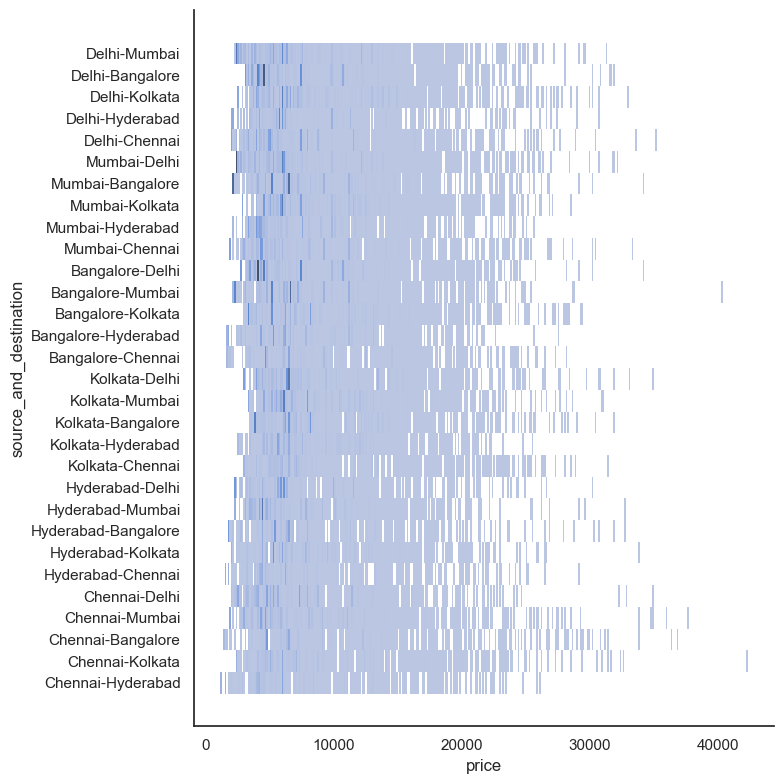

In [22]:
# Price distribution by route - Economy
fig = plt.figure(figsize=(8, 10))
sns.displot(data=df_economy, x='price', y='source_and_destination', height=8)

<Figure size 800x1000 with 0 Axes>

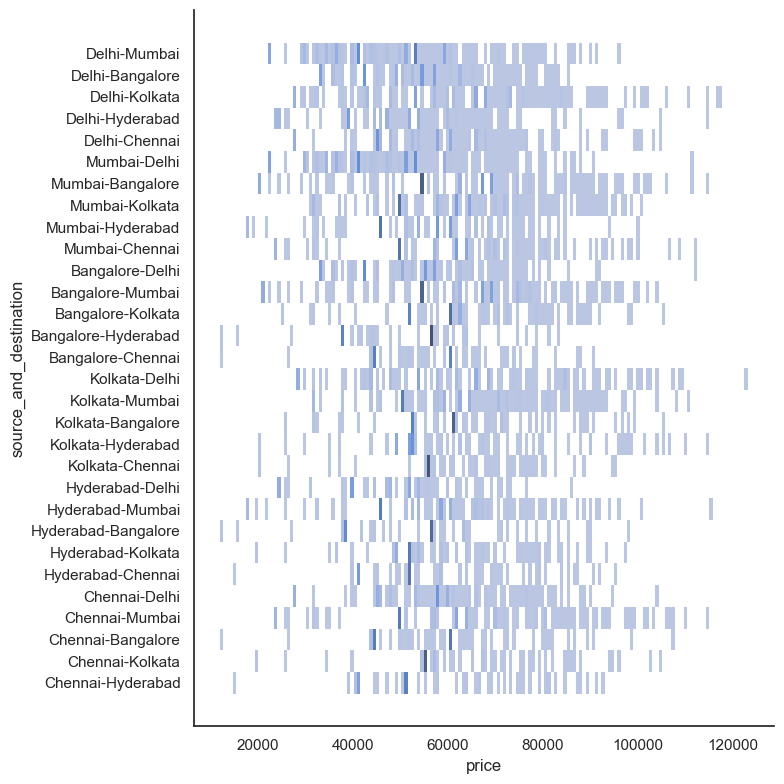

In [23]:
# Price distribution by route - Business
fig = plt.figure(figsize=(8, 10))
sns.displot(data=df_business, x='price', y='source_and_destination', height=8)

In [24]:
# Compare the prices of Business Class and Economy Class tickets.

C:\Users\Admin\AppData\Local\Temp\ipykernel_50548\424376707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='price', data=df, palette='hls', width=0.5, whis=3, linewidth=0.8)


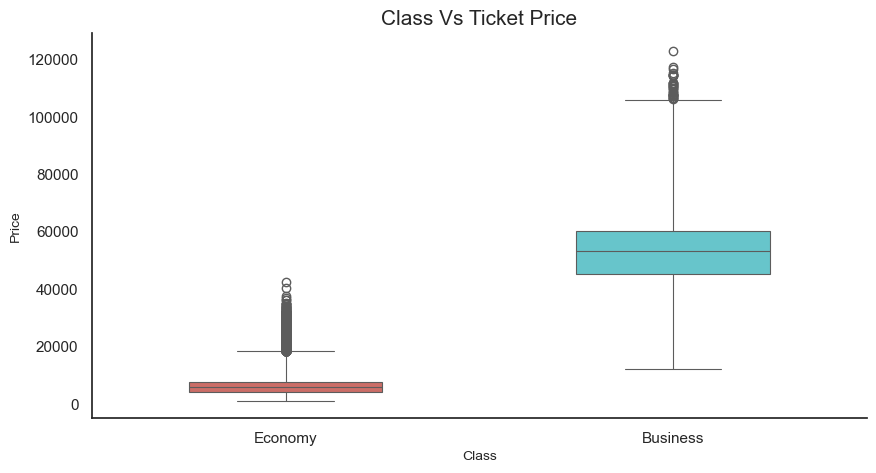

In [25]:
# Final Boxplot: Comparing ticket prices by class
# draw the boxplot to compare between the different classes with ticket price
plt.figure(figsize=(10, 5))
sns.boxplot(x='class', y='price', data=df, palette='hls', width=0.5, whis=3, linewidth=0.8)
plt.title('Class Vs Ticket Price', fontsize=15)
plt.xlabel('Class', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.yticks()
plt.show()

In [26]:
# The number of stops affects ticket prices.

In [27]:
# check the values of "stops"
df["stops"].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

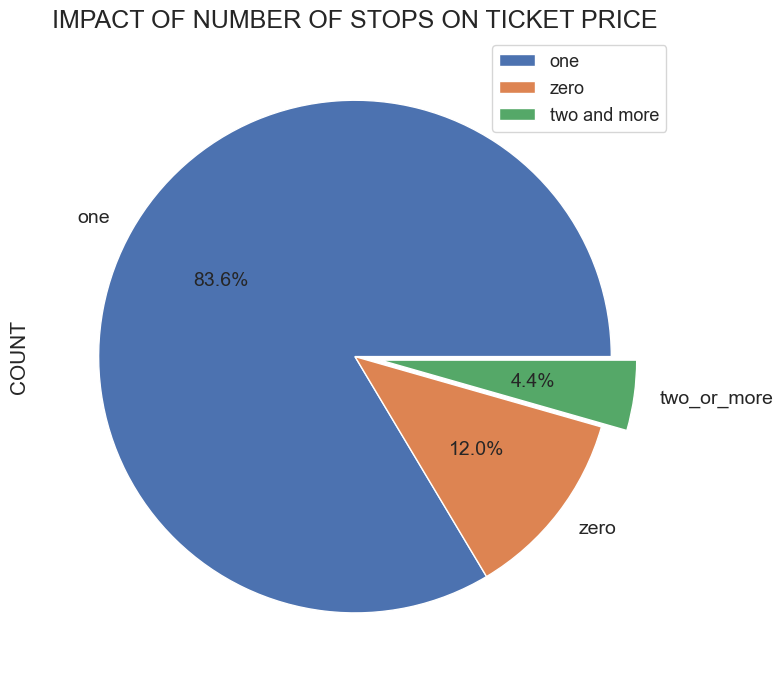

In [28]:
fig = plt.figure(figsize=(8, 10))
explode = (0, 0, 0.1)
df.stops.value_counts().plot(kind='pie', autopct="%1.1f%%", explode=explode, fontsize=14)
plt.ylabel('COUNT', fontsize=15)
plt.title("IMPACT OF NUMBER OF STOPS ON TICKET PRICE", fontsize=18)
plt.legend(['one', 'zero', 'two and more'], loc='upper right', fontsize=13)
plt.tight_layout()

In [29]:
# How does the price change with variations between different departure and arrival points?

R2 Score: 0.041700175722420685


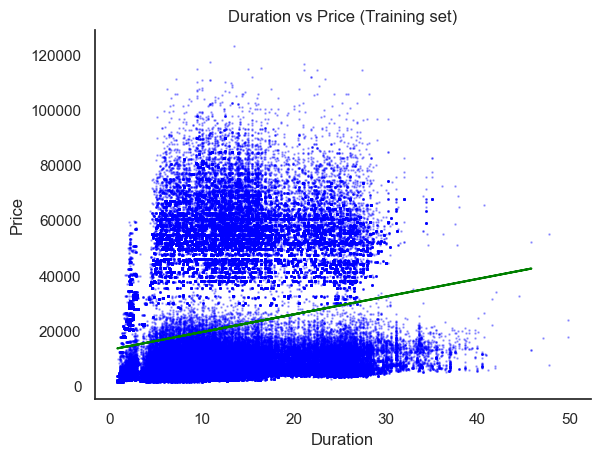

In [30]:
# Import Dataset
X = df.loc[:, "duration"].values
y = df.loc[:, "price"].values

X = X.reshape(-1, 1)

# Separating the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=22)

# Linear Regression
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Result prediction on Test set
y_pred = regressor.predict(X_test)

# Model Evaluation
from sklearn.metrics import r2_score
print(f"R2 Score: {r2_score(y_test, y_pred)}")

# Result visualization on Training Set
plt.scatter(X, y, color='blue', s=0.7, alpha=0.3)
plt.plot(X_train, regressor.predict(X_train), color='green')
plt.title('Duration vs Price (Training set)')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

In [31]:
# Building a model using linear regression, decision tree, and random forest.

In [32]:
# 4.1 Model Preprocessing

In [33]:
# Use Label Encoder to transform all object columns to int
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    feature_names = df.columns.tolist()
    feature_names.remove("price")
    X = df[feature_names].values
    y = df.price.values
    return X, y

# Execute the preparation function
X, y = prepare_X_y(df)

In [34]:
# Split data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

RANDOM_STATE = 42
TRAIN_SIZE = 0.7

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

# Normalize data
mmscaler = MinMaxScaler()
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.fit_transform(X_test)

In [35]:
# 4.2 Using Decision Tree

In [36]:
# Apply Decision Tree
modeldcr = DecisionTreeRegressor()
pipe = Pipeline(steps=[("mmscaler", mmscaler), ("modeldcr", modeldcr)])
modeldcr.fit(X_train, Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [37]:
# Calculate y_pred
y_pred = modeldcr.predict(X_test)

In [38]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"R2 score: {r2}")

Mean squared error: 13787002.838374585
R2 score: 0.9732117734647174


In [39]:
# Checking price differences by route
df.groupby(['airline', 'source_city', 'destination_city'], as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,0,0,1,2073.043478
1,0,0,2,4807.092426
2,0,0,3,2931.494792
3,0,0,4,4443.468160
4,0,0,5,3342.385350
5,0,1,0,1914.760870
6,0,1,2,3697.314003
7,0,1,3,2053.182540
8,0,1,4,3682.338762
9,0,1,5,2691.100000


In [40]:
# Copy data for results comparison
df_bk = df.copy()

In [41]:
# Calculate the output for Decision Tree visualization
out = pd.DataFrame({'Price_actual': Y_test, 'Price_pred': y_pred})
result = df_bk.merge(out, left_index=True, right_index=True)

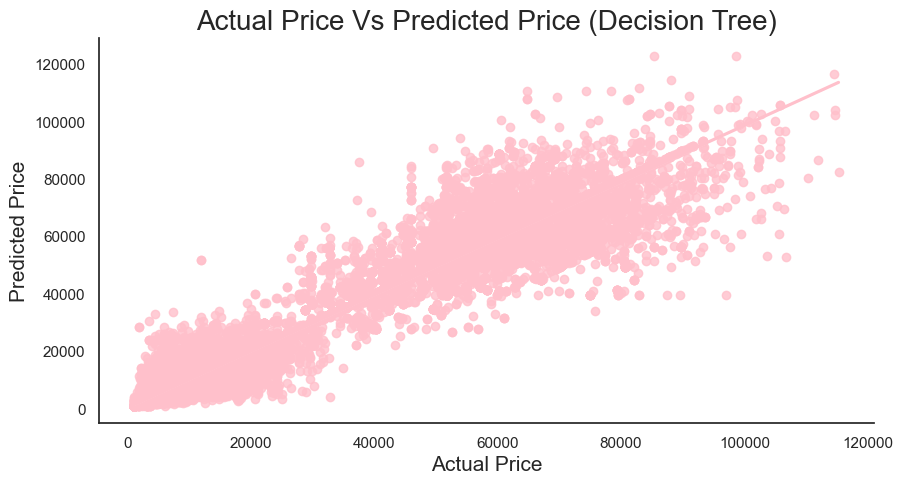

In [42]:
# Plot Actual vs Predicted (Decision Tree)
plt.figure(figsize=(10, 5))
sns.regplot(x='Price_actual', y='Price_pred', data=result, color='pink')
plt.title('Actual Price Vs Predicted Price (Decision Tree)', fontsize=20)
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.show()

In [43]:
# 4.3 Using Random - Forest

In [44]:
# Apply Random Forest
from sklearn.ensemble import RandomForestRegressor
modelrfr = RandomForestRegressor()
pipe1 = Pipeline(steps=[("mmscaler", mmscaler), ("modelrfr", modelrfr)]) # Build pipeline with scaler and model
modelrfr.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
# Calculate y_pred for Random Forest
y_pred1 = modelrfr.predict(X_test)

# Evaluate Random Forest model
mse = mean_squared_error(Y_test, y_pred1)
r2 = r2_score(Y_test, y_pred1)
print(f"Mean squared error: {mse}")
print(f"R2 score: {r2}")

Mean squared error: 8209126.01833019
R2 score: 0.9840496205002858


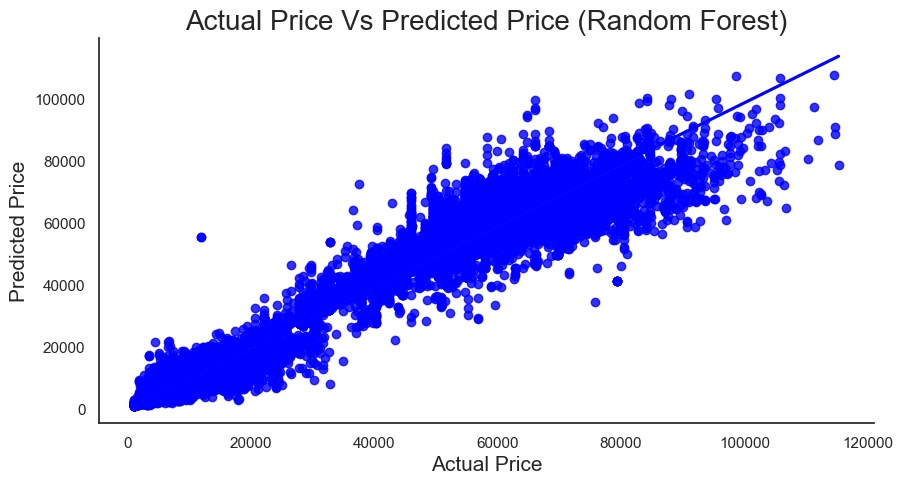

In [46]:
# Plot Actual vs Predicted (Random Forest)
out = pd.DataFrame({'Price_actual': Y_test, 'Price_pred': y_pred1})
result = df_bk.merge(out, left_index=True, right_index=True)

plt.figure(figsize=(10, 5))
sns.regplot(x='Price_actual', y='Price_pred', data=result, color='blue')
plt.title('Actual Price Vs Predicted Price (Random Forest)', fontsize=20)
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.show()

In [47]:
# 4.3 Using Linear Regression

In [48]:
# apply the linear regression
from sklearn.linear_model import LinearRegression
modelmlg = LinearRegression()
pipe1 = Pipeline(steps=[("mmscaler", mmscaler), ("modelmlg", modelmlg)]) # Build a pipeline with a scaler and a model
modelmlg.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
# calculate y_pred2
y_pred2 = modelmlg.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the mean squared error of the model
mse = mean_squared_error(Y_test, y_pred2)
print(f"Mean squared error: {mse}")

# Evaluate the R2 score of the model
r2 = r2_score(Y_test, y_pred2)
print(f"R2 score: {r2}")

Mean squared error: 49070241.26461302
R2 score: 0.9046562364171967


In [51]:
# calculate "output" and display it by dataframe
out = pd.DataFrame({'Price_actual': Y_test, 'Price_pred': y_pred2})
result = df_bk.merge(out, left_index=True, right_index=True)

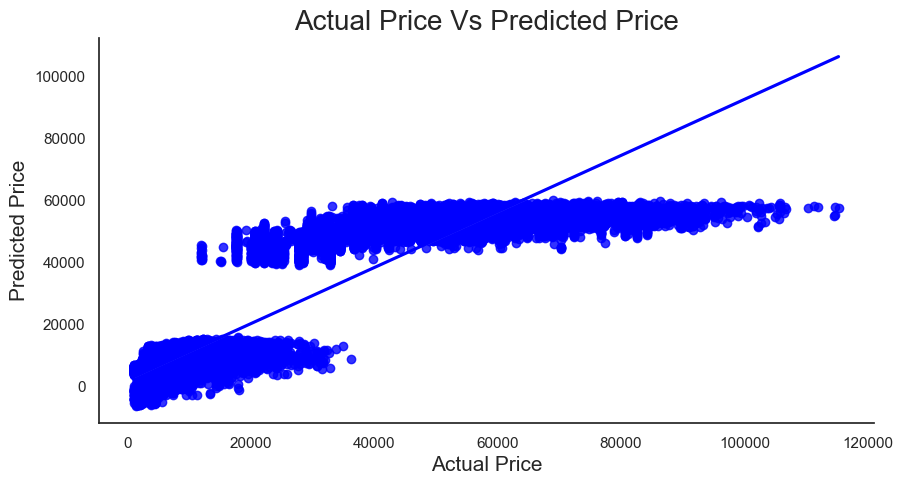

In [52]:
# plot regplot
plt.figure(figsize=(10, 5))
sns.regplot(x='Price_actual', y='Price_pred', data=result, color='blue')
plt.title('Actual Price Vs Predicted Price', fontsize=20)
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.show()